# these are exploring Data Analysis refer to Kaggle.

https://www.kaggle.com/monukhan/bank-customers-churn-prediction
https://www.kaggle.com/kmalit/bank-customer-churn-prediction

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset = pd.read_csv('churn_prediction_data/churn_prediction_data/train.csv')
print('shape:',dataset.shape)
dataset.head()

shape: (8000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0


In [3]:
#missing 

dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#types

dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

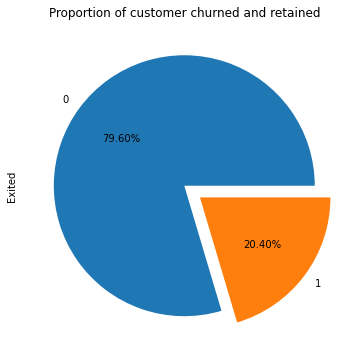

0    6368
1    1632
Name: Exited, dtype: int64

In [13]:
#Proportion of customer churned and retained

value_counts = pd.value_counts(dataset['Exited'])
plt.figure(figsize = (6,6))

#pie chart, explode:  distance , autopct:format the percentage to what place
value_counts.plot(kind = 'pie', explode = [0,0.15],autopct='%.2f%%', shadow=False)
plt.title('Proportion of customer churned and retained')
plt.show()
value_counts

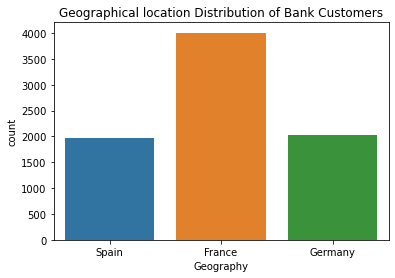

In [24]:
#location Distribution

plt.figure(figsize = (6,4))
sns.countplot(x="Geography", data=dataset)
plt.title('Geographical location Distribution of Bank Customers')
plt.show()

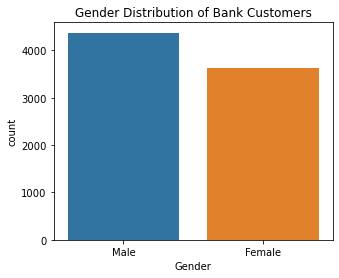

In [23]:
#gender distribution

plt.figure(figsize = (5,4))
sns.countplot(x="Gender", data=dataset)
plt.title('Gender Distribution of Bank Customers')
plt.show()

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

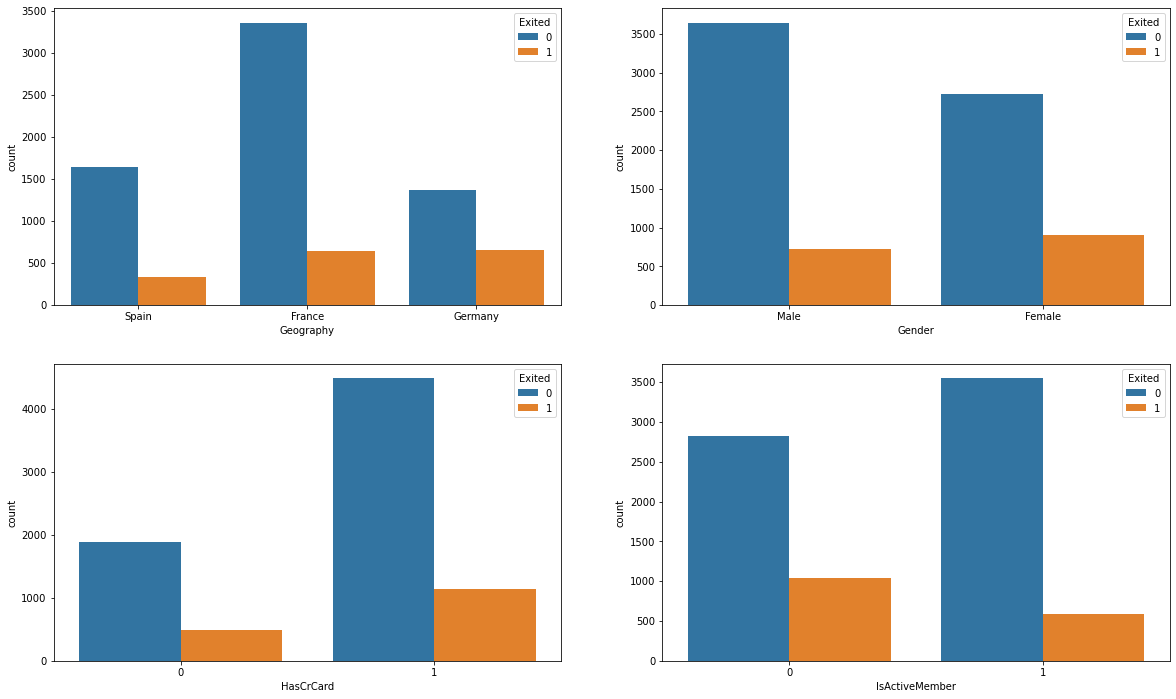

In [25]:
 # Relations based on the discrete data attributes

#ax:whrer Axes object to draw the plot onto
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

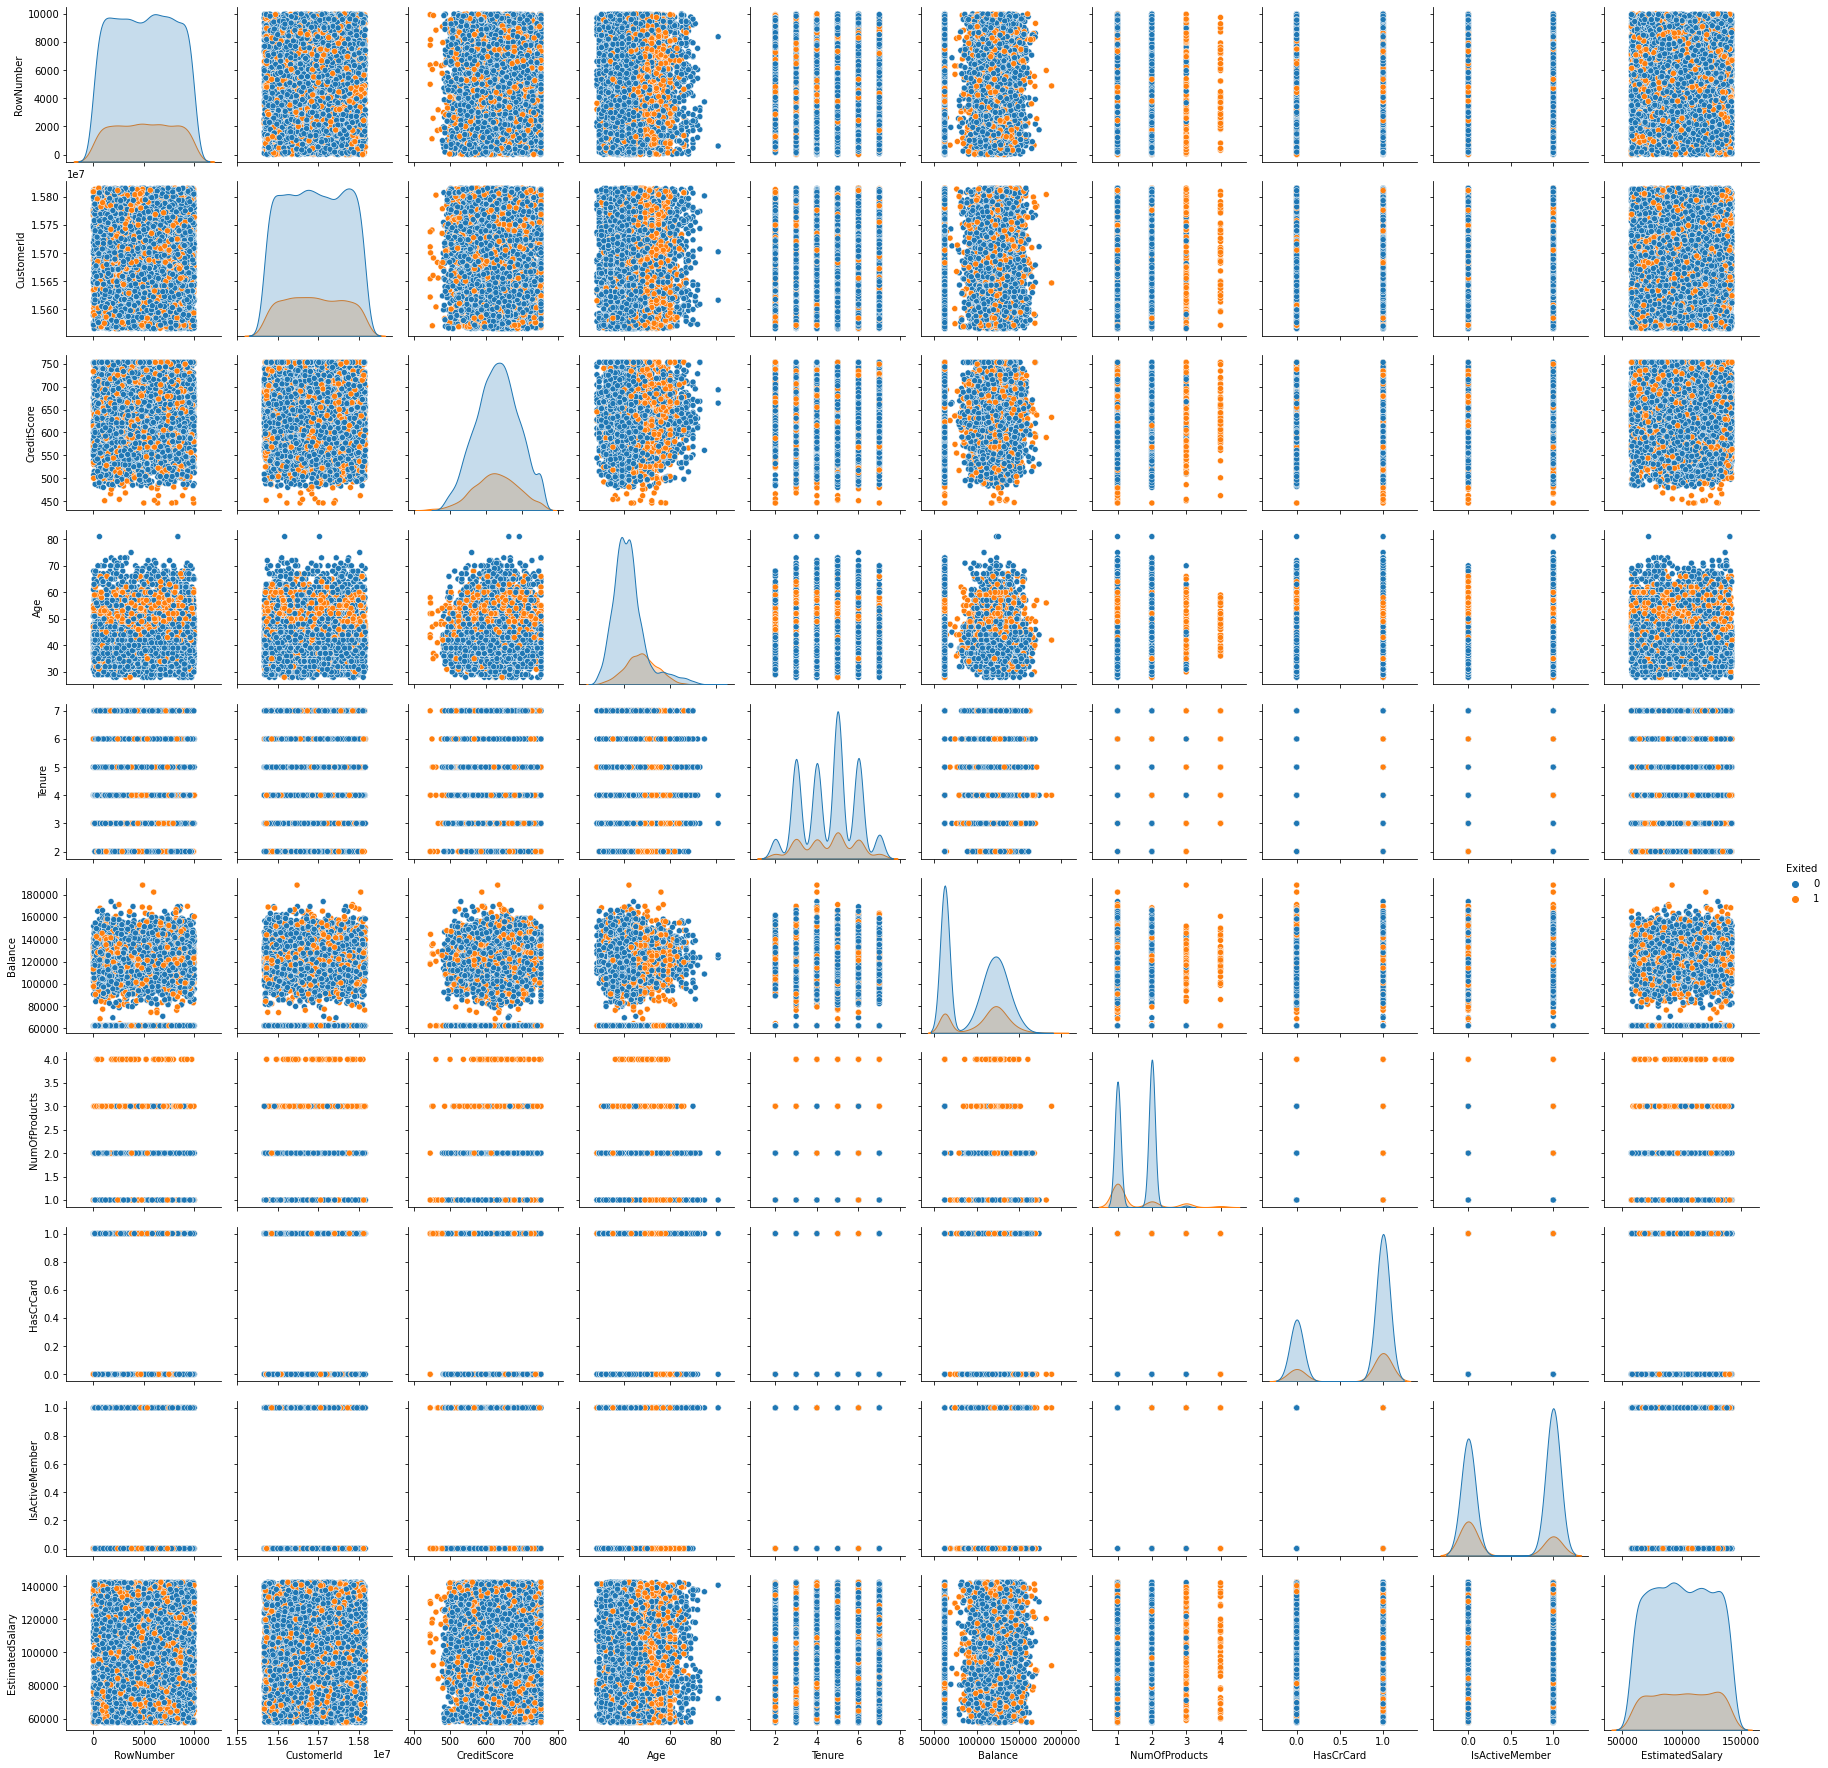

In [27]:
sns.pairplot(dataset, hue = 'Exited')

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

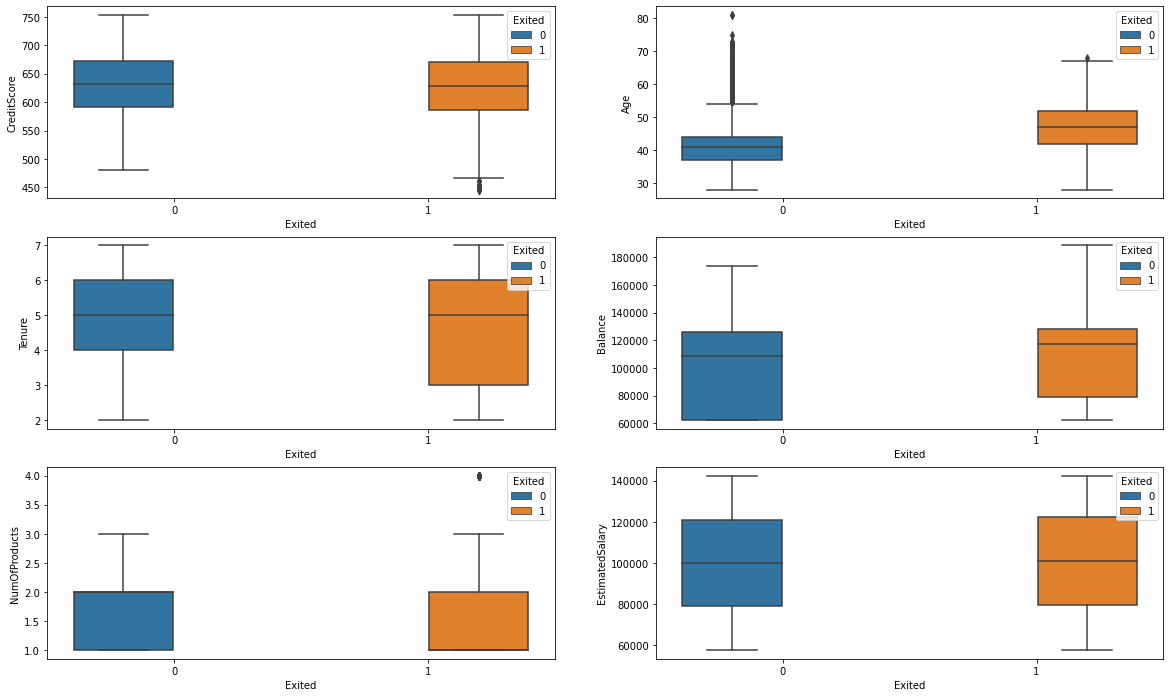

In [28]:
 # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset, ax=axarr[2][1])

(-0.5, 4.0)

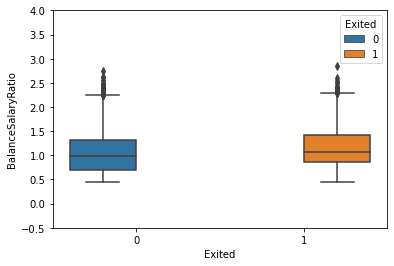

In [36]:
##it's cool to create new feature

dataset['BalanceSalaryRatio'] = dataset.Balance/dataset.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data =dataset)
plt.ylim(-0.5, 4)

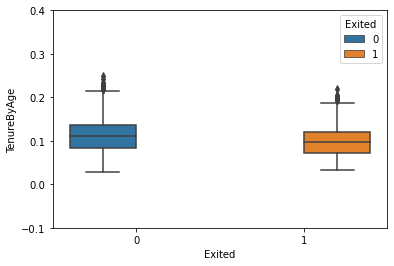

In [35]:
##it's cool to create new feature
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
dataset['TenureByAge'] = dataset.Tenure/(dataset.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = dataset)
plt.ylim(-0.1, 0.4)
plt.show()

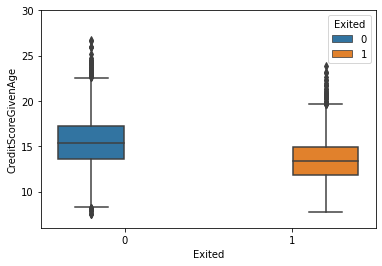

In [33]:
##it's cool to create new feature
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
dataset['CreditScoreGivenAge'] = dataset.CreditScore/(dataset.Age)
sns.boxplot(y='CreditScoreGivenAge',x = 'Exited', hue = 'Exited',data = dataset)
plt.ylim(6, 30)
plt.show()